In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

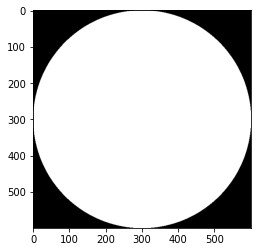

In [8]:
# circle
xx, yy = np.mgrid[:600, :600]
circle = (xx - 300) ** 2 + (yy - 300) ** 2
testim = (circle < 300**2).astype(int)
plt.imshow(testim, cmap='gray')

In [25]:
def make_circle(d):
    r = d // 2
    xx, yy = np.mgrid[:2*r, :2*r]
    circle = (xx - r) ** 2 + (yy - r) ** 2
    return((circle < r**2).astype(int))

In [104]:
def make_circle(d):
    r = d // 2
    xx, yy = np.mgrid[:2*r, :2*r]
    circle = (xx - r) ** 2 + (yy - r) ** 2
    return((circle < r**2).astype(int))


def border(seg):
    r = seg.shape[1]
    circle = make_circle(r)
    height_diff = seg.shape[0] - circle.shape[0]
    if height_diff > 0:
        circle = np.pad(circle, ((height_diff // 2 + height_diff % 2, height_diff // 2),  (0, seg.shape[0] % 2)))
    else:
        height_diff = -height_diff
        seg = np.pad(seg, height_diff // 2 + height_diff % 2)
    return np.sum(circle + seg == 1) / np.sum(circle)

0.47587791270101737

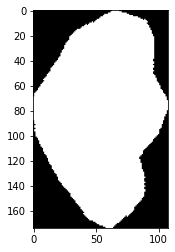

In [105]:
from feature_functions import rotate
img = "0003539"
seg_file = 'resized_data/example_segmentation_resized/ISIC_'+img+'_segmentation.png'
seg = plt.imread(seg_file)
seg = rotate(seg)
seg[seg > 0.1] = 1
seg[seg <= 0.1] = 0
plt.imshow(seg, cmap='gray')
border(seg)

0.47587791270101737

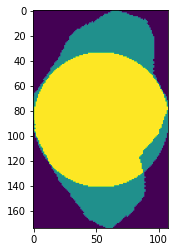

In [103]:
plt.imshow(seg + circle)
np.sum(circle + seg == 1) / np.sum(circle)

0.4320365411875886

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>